In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [17]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


aim ----> predict the tempreture

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature  239 non-null    int64  
 4   RH           239 non-null    int64  
 5   Ws           239 non-null    int64  
 6   Rain         239 non-null    float64
 7   FFMC         239 non-null    float64
 8   DMC          239 non-null    float64
 9   DC           239 non-null    float64
 10  ISI          239 non-null    float64
 11  BUI          239 non-null    float64
 12  FWI          239 non-null    float64
 13  Classes      239 non-null    object 
 14  Region       239 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.1+ KB


Data cleaning

In [19]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [20]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1


In [85]:
dataset.drop(122,inplace=True)

In [86]:
dataset.reset_index(inplace=True)
dataset[dataset.isnull().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [23]:
dataset.iloc[120:130] 

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0
121,121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
122,123,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
123,124,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,1
124,125,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1
125,126,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,1
126,127,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,1
127,128,11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire,1
128,129,12,6,2012,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,fire,1
129,130,13,6,2012,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,not fire,1


The dataset is converted in to two sets based on Region from 122th index, we can make a new column based on the Region 

1: "Bejaia Region Dataset"

2: "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [24]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1
dataset['Region']=dataset['Region'].astype(int)

In [25]:
df=dataset
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        238 non-null    int64  
 1   day          238 non-null    int64  
 2   month        238 non-null    int64  
 3   year         238 non-null    int64  
 4   Temperature  238 non-null    int64  
 5   RH           238 non-null    int64  
 6   Ws           238 non-null    int64  
 7   Rain         238 non-null    float64
 8   FFMC         238 non-null    float64
 9   DMC          238 non-null    float64
 10  DC           238 non-null    float64
 11  ISI          238 non-null    float64
 12  BUI          238 non-null    float64
 13  FWI          238 non-null    float64
 14  Classes      238 non-null    object 
 15  Region       238 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 29.9+ KB


In [27]:
df.drop(['index'],axis=1,inplace=True)

In [28]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [29]:
df=df.dropna().reset_index(drop=True)

In [30]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [32]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1


In [33]:
df=df.drop(122).reset_index(drop=True)

In [34]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,1


In [35]:
df.columns =df.columns.str.strip()

### changing the required columns as integer datatype

In [36]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          237 non-null    int64  
 1   month        237 non-null    int64  
 2   year         237 non-null    int64  
 3   Temperature  237 non-null    int64  
 4   RH           237 non-null    int64  
 5   Ws           237 non-null    int64  
 6   Rain         237 non-null    float64
 7   FFMC         237 non-null    float64
 8   DMC          237 non-null    float64
 9   DC           237 non-null    float64
 10  ISI          237 non-null    float64
 11  BUI          237 non-null    float64
 12  FWI          237 non-null    float64
 13  Classes      237 non-null    object 
 14  Region       237 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 27.9+ KB


### Changing the other columns to float datatype

In [38]:
objects = [features for features in df.columns if df[features].dtype=='O']
objects

['Classes']

In [39]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          237 non-null    int64  
 1   month        237 non-null    int64  
 2   year         237 non-null    int64  
 3   Temperature  237 non-null    int64  
 4   RH           237 non-null    int64  
 5   Ws           237 non-null    int64  
 6   Rain         237 non-null    float64
 7   FFMC         237 non-null    float64
 8   DMC          237 non-null    float64
 9   DC           237 non-null    float64
 10  ISI          237 non-null    float64
 11  BUI          237 non-null    float64
 12  FWI          237 non-null    float64
 13  Classes      237 non-null    object 
 14  Region       237 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 27.9+ KB


In [41]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,16.071730,7.540084,2012.0,32.172996,61.915612,15.556962,0.752743,78.118143,14.938397,50.332489,4.826160,16.987764,7.190295,0.485232
std,8.728431,1.102519,0.0,3.658000,14.930675,2.812262,2.014493,14.262317,12.436289,47.911663,4.169511,14.277565,7.467678,0.500840
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,9.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,6.000000,14.700000,1.400000,6.200000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.800000,11.500000,34.500000,3.800000,12.600000,4.900000,0.000000
75%,24.000000,9.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.300000,7.300000,22.900000,11.900000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [42]:
df.to_csv("Algerian_forest_fires_dataset.csv",index=False)

## EXPLORATORY DATA ANALYSIS

In [43]:
df_copy = df.drop(['day','month','year'],axis=1)

In [44]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [45]:
## categories in Classes
df_copy['Classes'].value_counts()


Classes
fire             130
not fire          96
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [46]:
## Encodiing of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains("not fire"),0,1)

In [47]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
232,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
233,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
234,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
235,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
236,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [49]:
df_copy['Classes'].value_counts()

Classes
1    136
0    101
Name: count, dtype: int64

In [50]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

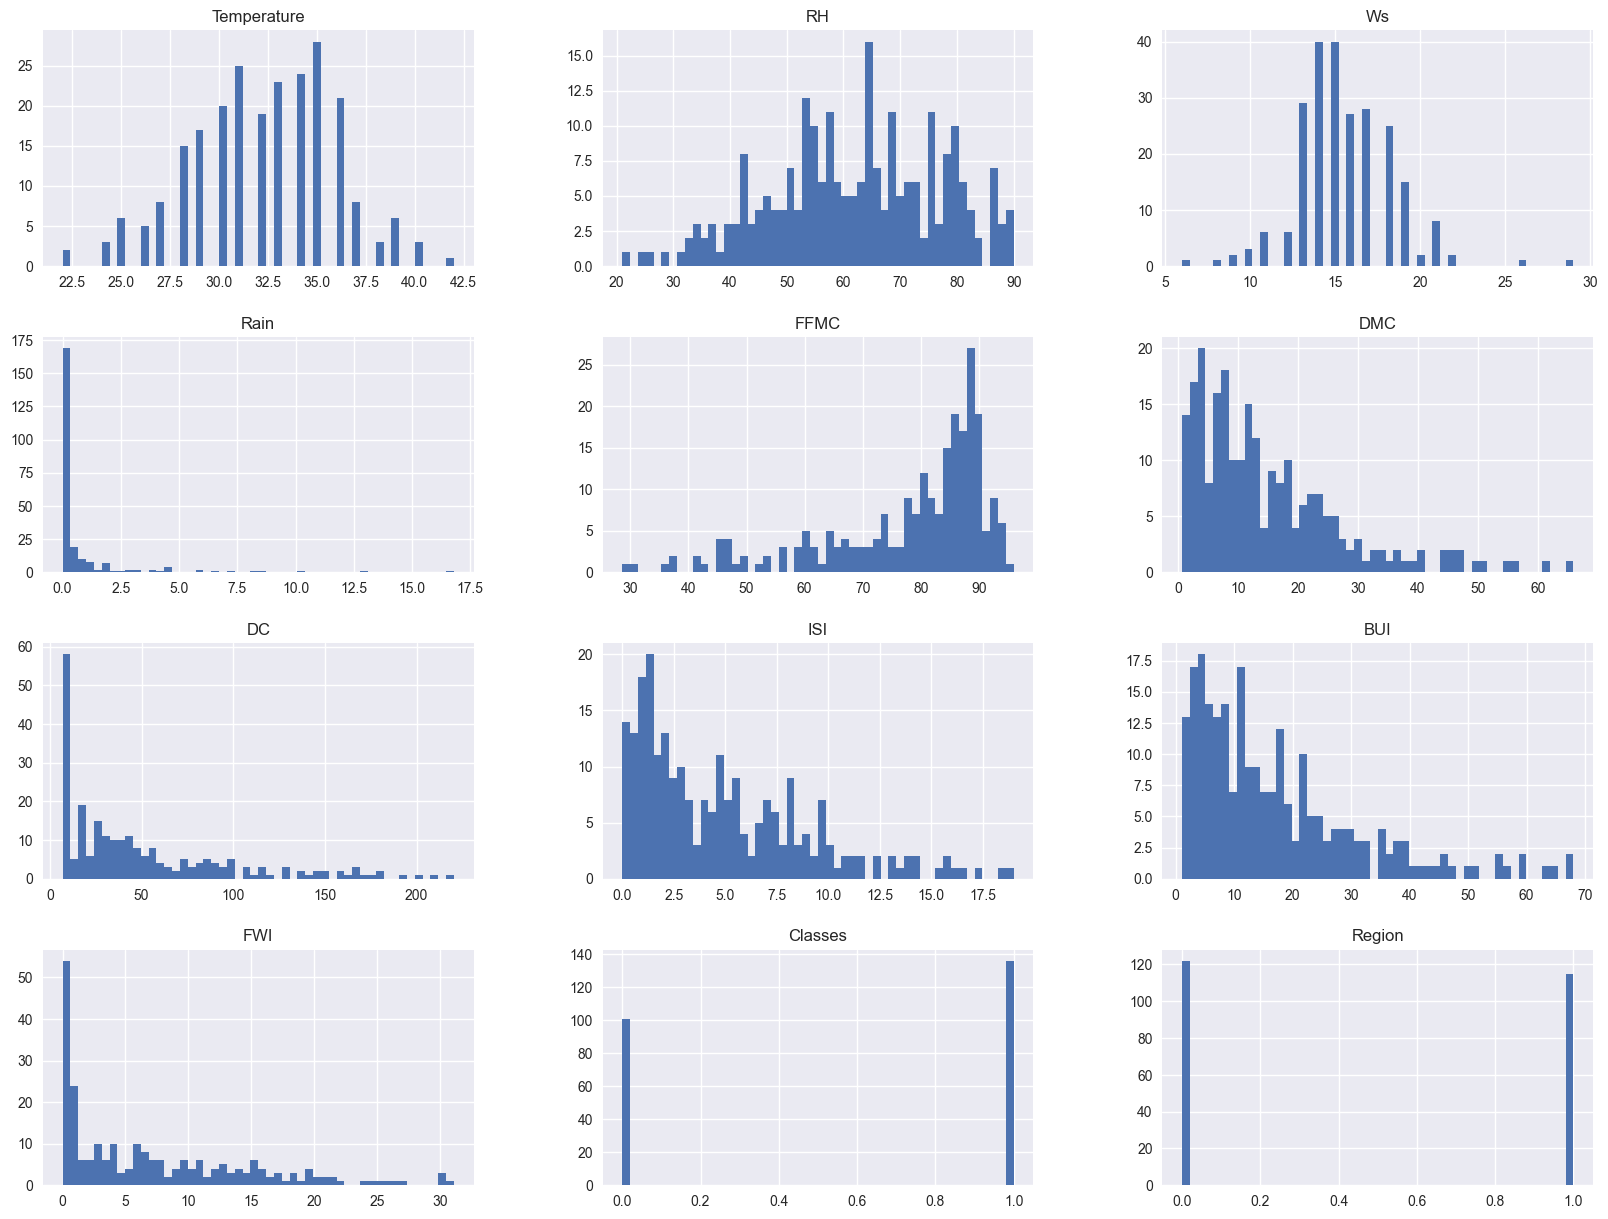

In [51]:
## plot density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [52]:
## Percentage for pie chart

percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    57.383966
0    42.616034
Name: proportion, dtype: float64

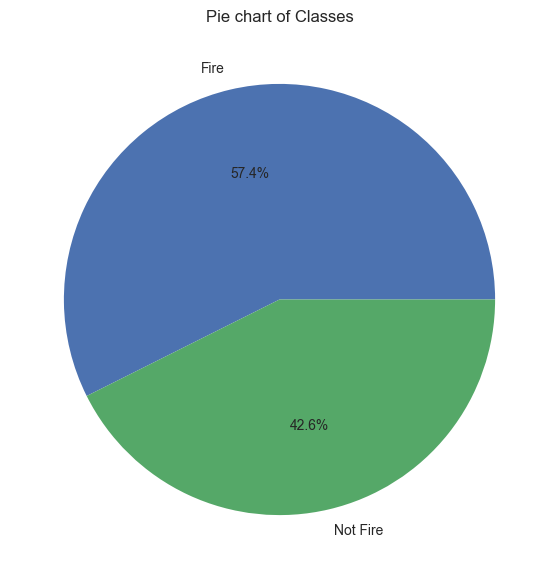

In [53]:
# Plotting Pie chart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")
plt.show()

## Correlation

In [54]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649487,-0.289908,-0.323826,0.679510,0.485523,0.374816,0.604899,0.459351,0.567851,0.513009,0.280098
RH,-0.649487,1.000000,0.253612,0.216382,-0.640799,-0.404939,-0.221519,-0.686481,-0.349585,-0.580635,-0.426943,-0.418917
Ws,-0.289908,0.253612,1.000000,0.178487,-0.187390,-0.018945,0.064157,-0.008728,0.013816,0.015008,-0.084362,-0.162605
Rain,-0.323826,0.216382,0.178487,1.000000,-0.541526,-0.287039,-0.296757,-0.345880,-0.298392,-0.323976,-0.378916,-0.046052
FFMC,0.679510,-0.640799,-0.187390,-0.541526,1.000000,0.600191,0.502872,0.739208,0.588481,0.691458,0.770093,0.249329
DMC,0.485523,-0.404939,-0.018945,-0.287039,0.600191,1.000000,0.873958,0.674752,0.981925,0.873675,0.580336,0.217752
DC,0.374816,-0.221519,0.064157,-0.296757,0.502872,0.873958,1.000000,0.500766,0.941115,0.735330,0.505117,-0.060927
ISI,0.604899,-0.686481,-0.008728,-0.345880,0.739208,0.674752,0.500766,1.000000,0.637740,0.921725,0.733213,0.289739
BUI,0.459351,-0.349585,0.013816,-0.298392,0.588481,0.981925,0.941115,0.637740,1.000000,0.855437,0.581363,0.112888
FWI,0.567851,-0.580635,0.015008,-0.323976,0.691458,0.873675,0.735330,0.921725,0.855437,1.000000,0.717246,0.222866


<Axes: >

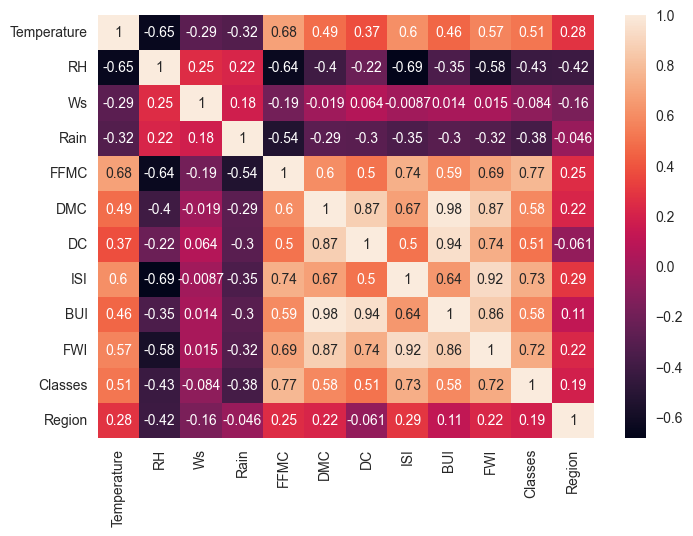

In [55]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

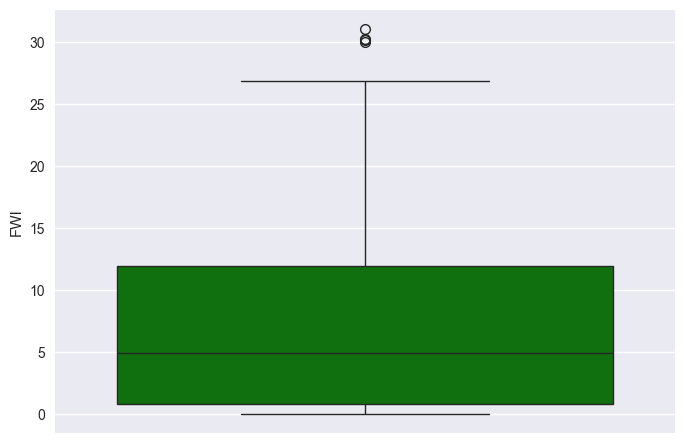

In [56]:
sns.boxplot(df_copy['FWI'],color='green')

## monthly fire analysis

In [57]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel regions')

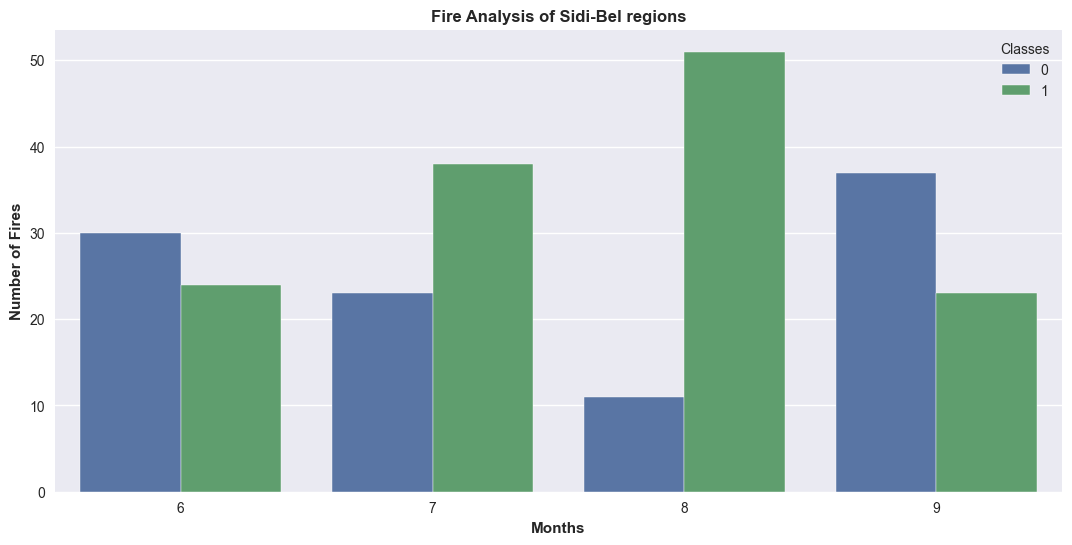

In [58]:
dftemp=df_copy.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel regions",weight='bold')

# Machine Learning with Linear Regression and ridge, Lasso, Elastic

In [59]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [60]:
#independent and dependent features
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [61]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [62]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
232    6.5
233    0.0
234    0.2
235    0.7
236    0.5
Name: FWI, Length: 237, dtype: float64

In [63]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
X_train.shape, X_test.shape


((177, 11), (60, 11))

In [65]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.665057,-0.320582,-0.321505,0.706665,0.527271,0.410766,0.622495,0.498420,0.488489,0.298377
RH,-0.665057,1.000000,0.251415,0.209864,-0.628340,-0.429798,-0.244590,-0.710546,-0.375119,-0.419504,-0.404872
Ws,-0.320582,0.251415,1.000000,0.282649,-0.233315,-0.045997,0.032487,-0.036549,-0.014313,-0.087691,-0.194454
Rain,-0.321505,0.209864,0.282649,1.000000,-0.538166,-0.287163,-0.304660,-0.344581,-0.299653,-0.383898,-0.045654
FFMC,0.706665,-0.628340,-0.233315,-0.538166,1.000000,0.607671,0.513759,0.743102,0.596643,0.775434,0.231814
DMC,0.527271,-0.429798,-0.045997,-0.287163,0.607671,1.000000,0.885816,0.668663,0.983283,0.571227,0.236981
DC,0.410766,-0.244590,0.032487,-0.304660,0.513759,0.885816,1.000000,0.493938,0.943894,0.490785,-0.052514
ISI,0.622495,-0.710546,-0.036549,-0.344581,0.743102,0.668663,0.493938,1.000000,0.632879,0.728498,0.293253
BUI,0.498420,-0.375119,-0.014313,-0.299653,0.596643,0.983283,0.943894,0.632879,1.000000,0.571590,0.129794
Classes,0.488489,-0.419504,-0.087691,-0.383898,0.775434,0.571227,0.490785,0.728498,0.571590,1.000000,0.159154


<Axes: >

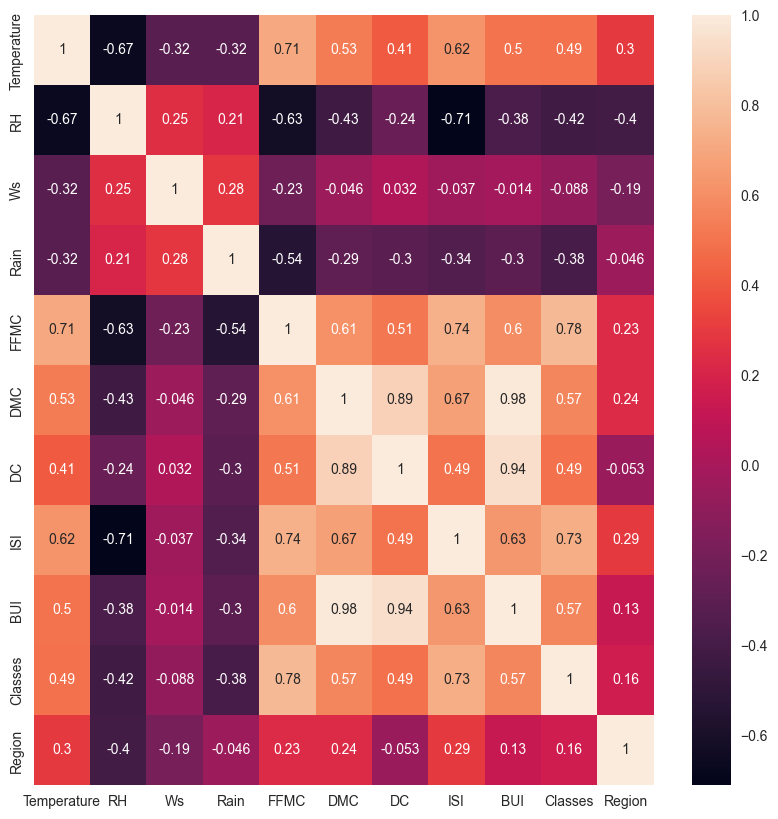

In [66]:
# Checking multi-colinearity
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [67]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(X_train,0.85) # the threshold value is obtained by domain expertise
corr_features

{'BUI', 'DC'}

In [69]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((177, 9), (60, 9))

## Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
X_train_scaled

array([[-0.61780471, -1.41231892, -0.21592777, ...,  0.85323998,
         0.87749644,  1.04036193],
       [-0.06412656, -1.0192679 , -0.60198046, ..., -0.71250766,
        -1.13960576, -0.96120396],
       [-0.06412656,  0.81497019, -0.60198046, ...,  0.09408961,
         0.87749644, -0.96120396],
       ...,
       [-2.00200007,  0.8804787 ,  0.5561776 , ..., -1.09208284,
        -1.13960576, -0.96120396],
       [ 1.59690787, -1.80536994, -0.21592777, ...,  2.58505176,
         0.87749644,  1.04036193],
       [-0.61780471,  0.9459872 ,  2.10038835, ..., -0.8785718 ,
        -1.13960576, -0.96120396]])

## Box Plots to understand the Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

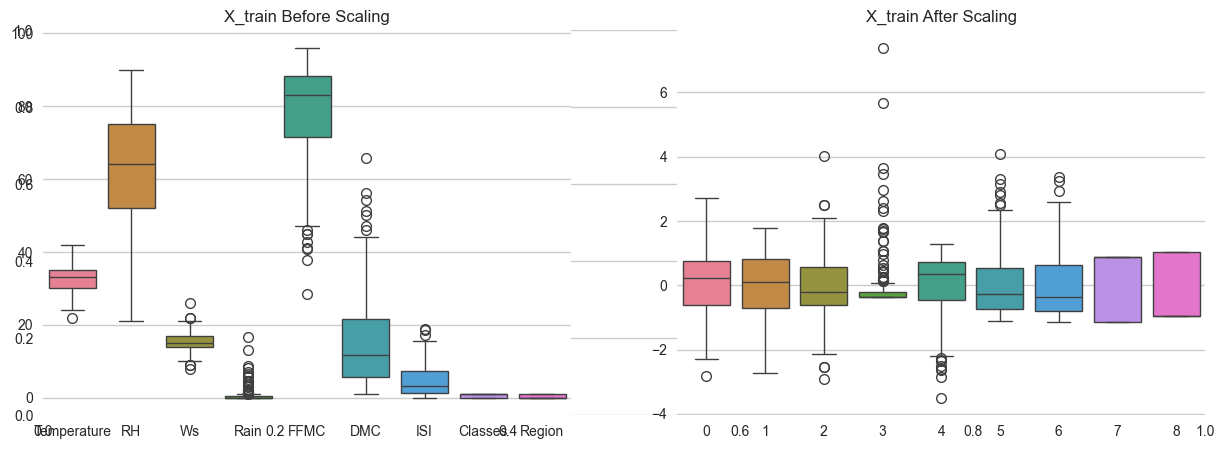

In [72]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Linear Regression Model

Mean Absolute Error : 0.6664762562254469
r2 score : 0.9824970567881776


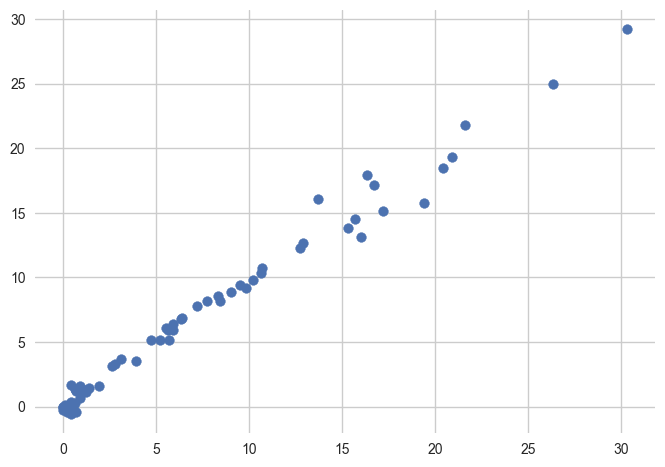

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute Error : 1.2610141030522406
r2 score : 0.944211826607573


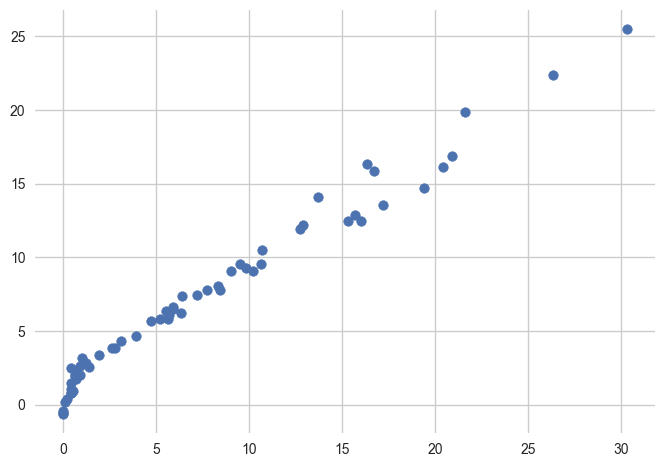

In [74]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [75]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [76]:
lassocv.alpha_

np.float64(0.02764232266413083)

In [77]:
lassocv.mse_path_

array([[53.72421051, 61.98906183, 35.73805244, 70.16934321, 55.33267504],
       [48.15538213, 57.03740432, 30.81571706, 67.09740555, 49.39072954],
       [43.2413946 , 51.35822039, 26.61658286, 60.62196576, 43.91891295],
       [38.16547059, 46.25017593, 23.04091878, 54.91553049, 39.18575271],
       [33.72322022, 40.74036934, 20.00232611, 49.63906387, 35.09328937],
       [29.83388936, 35.92438818, 17.42608771, 43.91569016, 30.52790325],
       [26.42719098, 31.71333497, 15.24745246, 38.90299319, 26.24159697],
       [23.44168735, 28.02992408, 13.41047583, 34.51153566, 22.54907352],
       [20.82440109, 24.8068349 , 11.86675492, 30.66222837, 19.3703463 ],
       [18.52858699, 21.98542068, 10.57441625, 27.28646683, 16.63583925],
       [16.51368256, 19.51432734,  9.49738488, 24.32444691, 14.28652014],
       [14.74432043, 17.34958054,  8.60443002, 21.72402761, 12.26984038],
       [13.18965753, 15.45208396,  7.86862405, 19.43938932, 10.54067756],
       [11.82260125, 13.78801927,  7.2

Mean Absolute Error : 0.6693257671221615
r2 score : 0.9822300822960779


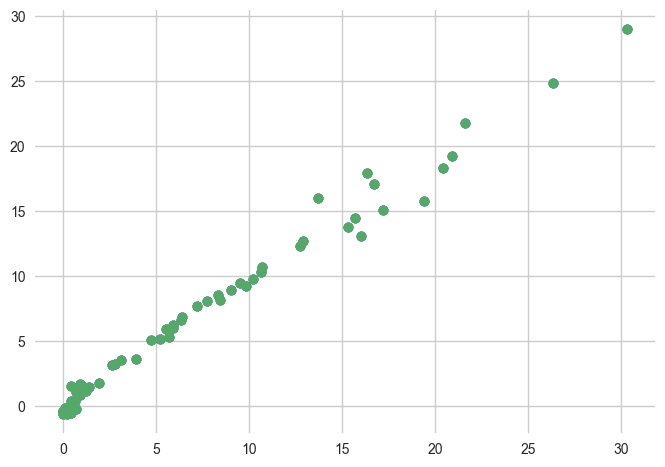

In [78]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean Absolute Error : 0.6824559559932168
r2 score : 0.9819526225879848


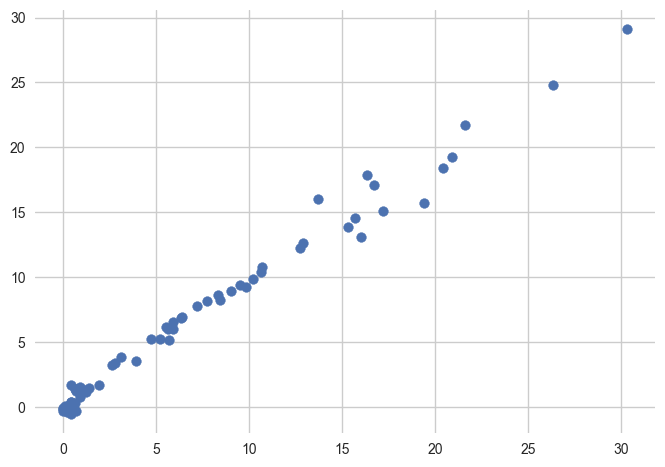

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

Mean Absolute Error : 0.6824559559932168
r2 score : 0.9740469077009758


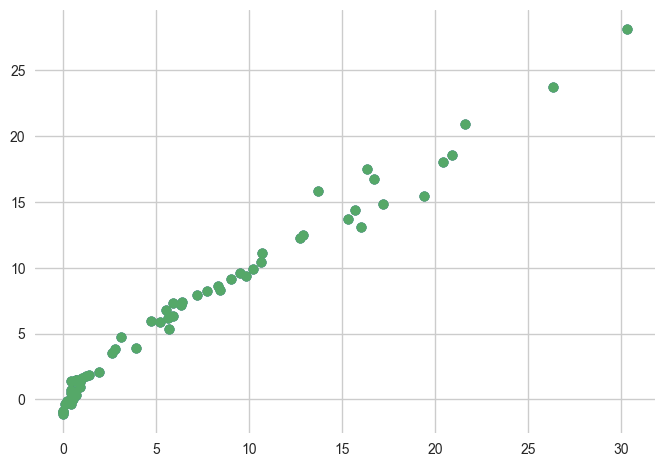

In [80]:
from sklearn.linear_model import RidgeCV
ridgecv= RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

In [81]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elastic Net 

Mean Absolute Error : 2.0759824406652116
r2 score : 0.8681869612288797


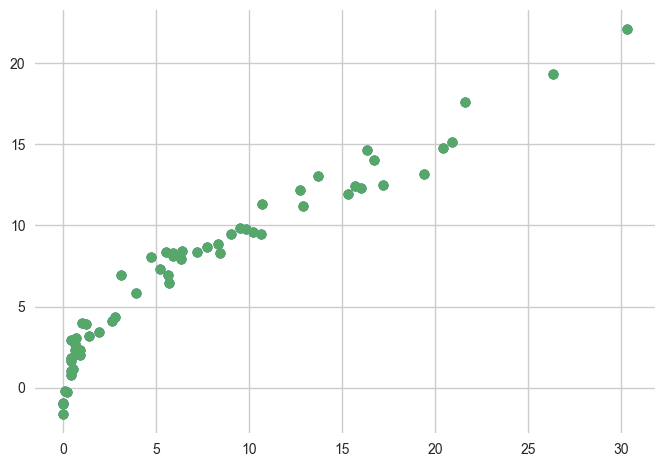

In [82]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

Mean Absolute Error : 0.7651398624921557
r2 score : 0.9792874393253741


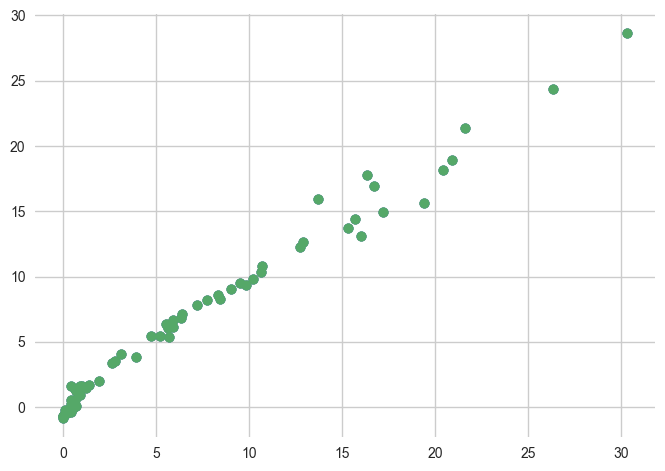

In [83]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print('r2 score :',score)
plt.scatter(y_test,y_pred)

In [84]:
## Pickinling the best Model
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))